# Imports
---

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Cargar Data
___

In [2]:
#index col para que sepa que esa corresponde a los indices

df_data_replace = pd.read_csv('./dataset_rp.csv', index_col=[0])
df_data_dummies = pd.read_csv('./dataset_dm.csv', index_col=[0])
df_data_dummies_drop = pd.read_csv('./dataset_dmDr.csv', index_col=[0])

# Split entre target y patron

---

- Split

In [3]:
# Para dataset: Replace
x_rp = df_data_replace.drop('StarType', axis=1)
y_rp = df_data_replace['StarType']

In [4]:
# Para dataset: Dummies
x_dm = df_data_dummies.drop('StarType', axis=1)
y_dm = df_data_dummies['StarType']

In [5]:
# Para dataset: Dummies con Drop
x_dmDr = df_data_dummies_drop.drop('StarType', axis=1)
y_dmDr = df_data_dummies_drop['StarType']

- Validación

In [6]:
print(x_rp.shape)
print(y_rp.shape)

(240, 6)
(240,)


# Split entre train y test

___

- Split

In [7]:
# Para dataset: Replace
x_rp_train, x_rp_test, y_rp_train, y_rp_test = train_test_split(x_rp, y_rp, test_size=0.2, random_state=42, shuffle = True)

In [8]:
# Para dataset: Dummies
x_dm_train, x_dm_test, y_dm_train, y_dm_test = train_test_split(x_dm, y_dm, test_size=0.2, random_state=42, shuffle = True)

In [9]:
# Para dataset: Dummies con Drop
x_dmDr_train, x_dmDr_test, y_dmDr_train, y_dmDr_test = train_test_split(x_dmDr, y_dmDr, test_size=0.2, random_state=42, shuffle = True)

- Validación

In [10]:
print(x_rp_train.shape)
print(x_rp_test.shape)

(192, 6)
(48, 6)


# Escalamiento/Normalización de los datos 
---

In [11]:
# Para dataset: Replace

st_scaler_rp = StandardScaler() #Creo instancia del scaler
x_rp_train = st_scaler_rp.fit_transform(x_rp_train) # escalo train
x_rp_test = st_scaler_rp.transform(x_rp_test) #transformo test

In [12]:
# Para dataset: Dummies

st_scaler_dm = StandardScaler() #Creo instancia del scaler
x_dm_train = st_scaler_dm.fit_transform(x_dm_train) # escalo train
x_dm_test = st_scaler_dm.transform(x_dm_test) #transformo test

In [13]:
# Para dataset: Dummies con Drop

st_scaler_dmDr = StandardScaler() #Creo instancia del scaler
x_dmDr_train = st_scaler_dmDr.fit_transform(x_dmDr_train) # escalo train
x_dmDr_test = st_scaler_dmDr.transform(x_dmDr_test) #transformo test

# Entrenamiento del modelo 

---

> Defino función para crear objetos del modelo Logistic Regresion, bajo distintas configuraciones

In [14]:
def logistic_model(C_, solver_, multiclass_):
  model = LogisticRegression(random_state = 42, solver = solver_, multi_class = multiclass_, n_jobs = -1, C = C_)
  return model

> Itero sobre distintas configuraciones del modelo, buscando cual es la mejor

- Defino parámetros sobre los cuales iterar

In [15]:
# *** Clases ***
multiclass = ['ovr', 'multinomial']

# *** Algoritmos de solvers ***
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

# *** Scores y params usados ***
scores = []
params = []

- Itero (Todas las pruebas las hago con dataset RP)

In [16]:
for algClass in multiclass:
    for algSolver in solver_list:
      try:
        #*** Instancio modelo ****
        model = logistic_model(1, algSolver, algClass)

        #*** Entreno modelo con train ****
        model.fit(x_rp_train, y_rp_train)

        #*** Predicción sobre test ****
        predictions = model.predict(x_rp_test)

        #*** Evaluo desemeño comparando con testTarget ***
        accuracy = accuracy_score(y_rp_test, predictions)

        #*** Guardo combinación usada y su score ***
        params.append(algClass + '/' + algSolver)
        scores.append(accuracy)
        
      except:
        # Hay algunas combinaciones no permitidas
        None # En ese caso, que no haga nada

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


> Evaluación Gráfica de los modelos

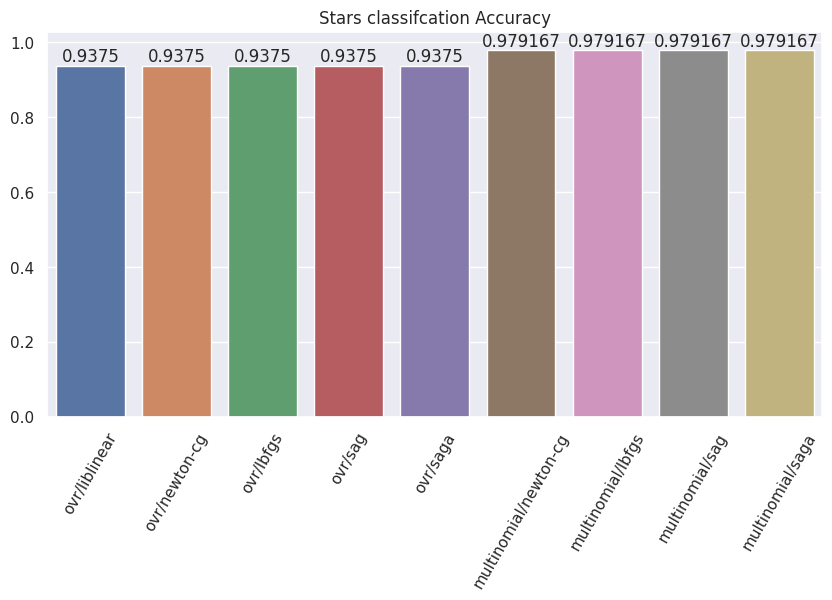

In [17]:
fig = plt.figure(figsize=(10,5))

splot = sns.barplot(x=params, y=scores)

splot.set_title('Stars classifcation Accuracy')
plt.bar_label(splot.containers[0])
plt.xticks(rotation=60)
plt.show()

# Evaluación del modelo elegido
___

> Entrenamiento, predicción y evluación general del modelo los 3 datasets

- Creo objetos del modelo 

In [18]:
model_rp = logistic_model(1, 'newton-cg', 'multinomial')
model_dm = logistic_model(1, 'newton-cg', 'multinomial')
model_dmDr = logistic_model(1, 'newton-cg', 'multinomial')

- Entreno el modelo con train 

In [19]:
model_rp.fit(x_rp_train, y_rp_train)
model_dm.fit(x_dm_train, y_dm_train)
model_dmDr.fit(x_dmDr_train, y_dmDr_train)

LogisticRegression(C=1, multi_class='multinomial', n_jobs=-1, random_state=42,
                   solver='newton-cg')

- Hago predicciones con test

In [20]:
predictions_rp = model_rp.predict(x_rp_test)
predictions_dm = model_dm.predict(x_dm_test)
predictions_dmDr = model_dmDr.predict(x_dmDr_test)

- Evaluación general respecto a testTarget

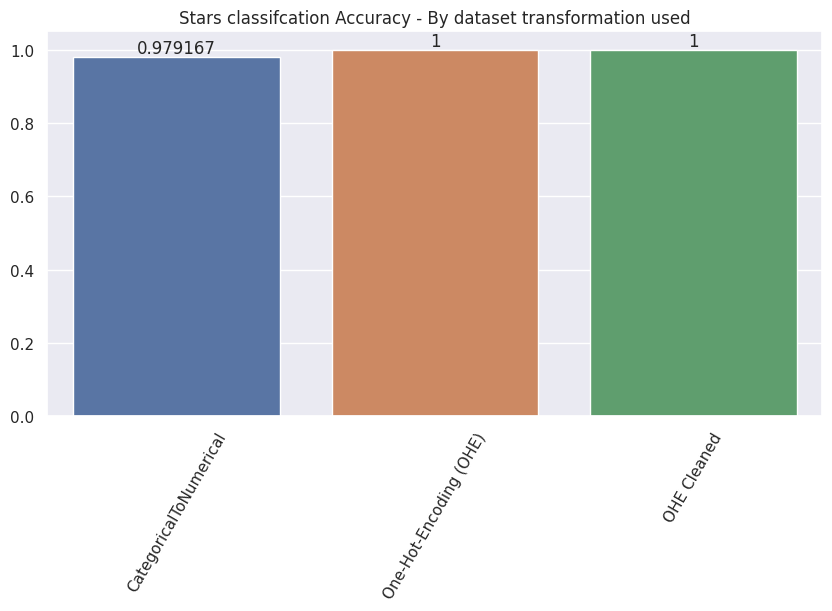

In [21]:
# Calculo accuracy

accuracy = []
accuracy.append( accuracy_score(y_rp_test, predictions_rp) )
accuracy.append( accuracy_score(y_dm_test, predictions_dm) )
accuracy.append( accuracy_score(y_dmDr_test, predictions_dmDr) )

# Defino datasets de la accuracy obtenida
datasetEval = ['CategoricalToNumerical', 'One-Hot-Encoding (OHE)', 'OHE Cleaned']

#Grafico

fig = plt.figure(figsize=(10,5))

splot = sns.barplot(x=datasetEval, y=accuracy)

splot.set_title('Stars classifcation Accuracy - By dataset transformation used')
plt.bar_label(splot.containers[0])
plt.xticks(rotation=60)
plt.show()

> Matriz de confusión

- Creo Matrices

In [22]:
cm_rp = confusion_matrix(y_rp_test, predictions_rp, labels=model_rp.classes_)
cm_dm = confusion_matrix(y_dm_test, predictions_dm, labels=model_dm.classes_)
cm_dmDr = confusion_matrix(y_dmDr_test, predictions_dmDr, labels=model_dmDr.classes_)

- Grafico las matrices

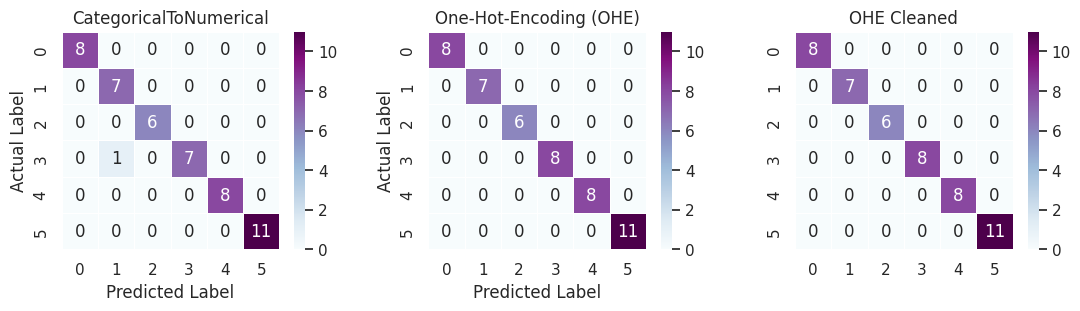

In [23]:
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(11,3))

sns.heatmap(cm_rp, annot=True, linewidth=0.5, square=True, cmap='BuPu', ax = axs[0]) 
sns.heatmap(cm_dm, annot=True, linewidth=0.5, square=True, cmap='BuPu', ax = axs[1])
sns.heatmap(cm_dmDr, annot=True, linewidth=0.5, square=True, cmap='BuPu', ax = axs[2]) 

axs[0].set_title('CategoricalToNumerical')
axs[1].set_title('One-Hot-Encoding (OHE)')
axs[2].set_title('OHE Cleaned')

for plot in list(range(2)):
    axs[plot].set_ylabel('Actual Label')
    axs[plot].set_xlabel('Predicted Label')

# Elementos extra de regresión logística
___

> Probabilidades de cada variable categórica por instancias

- Encontrar elemento con predicción errónea en RP

In [24]:
failedPred = np.array(predictions_dm) - np.array(predictions_rp)
failedPred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [25]:
failedPred.argmax()

30

- Probabilidades del registro 30

In [26]:
model_rp.predict_proba(x_rp_test)[30]

array([0.01170583, 0.65450189, 0.01372234, 0.18408774, 0.11997317,
       0.01600904])

- Comrobar el Elemento elegido

In [27]:
predictions_rp[30]

1

> Pesos de los coeficietntes de los features que componen el patrón

- Pesos por cada feature

In [28]:
# Data
coefs = model_rp.coef_[0]
fNames = x_rp.columns.values

#Dict
weightsDict = {'Weights': coefs, 'Features': fNames}

# DF del Dict

weigths = pd.DataFrame(weightsDict)
weigths.sort_values(['Weights'], ascending=[True], inplace=True)

- Gráfica peso asignado a cada feature

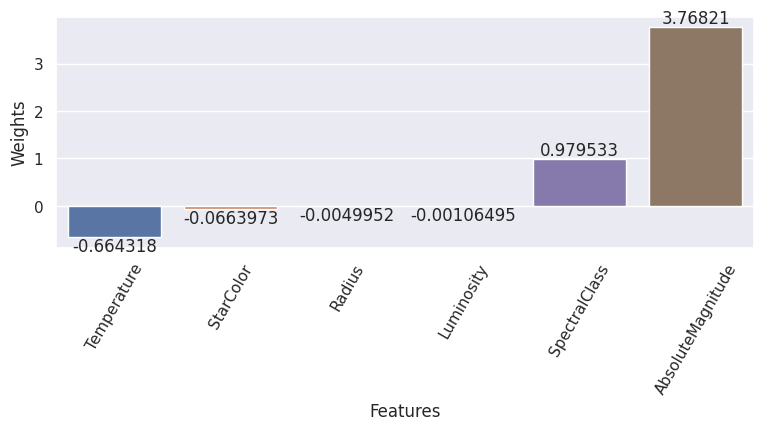

In [29]:
plt.figure(figsize=(9,3))

coefSplot = sns.barplot(data= weigths, x='Features', y='Weights')

plt.bar_label(coefSplot.containers[0])
plt
plt.xticks(rotation=60)
plt.show()

# Random Forest

___

> Imports

In [30]:
from sklearn.ensemble import RandomForestClassifier

> Entrenamiento del modelo (Con dataset normal, RP, Categorical to Numerical)

In [31]:
rf_model = RandomForestClassifier()
rf_model.fit(x_rp_train, y_rp_train)

RandomForestClassifier()

> Predicciones

In [32]:
rf_predictions = rf_model.predict(x_rp_test)

> Evaluación del modelo

In [33]:
rf_accuracy = accuracy_score(y_rp_test, rf_predictions)
rf_accuracy

1.0

> Gráfico Accuracy

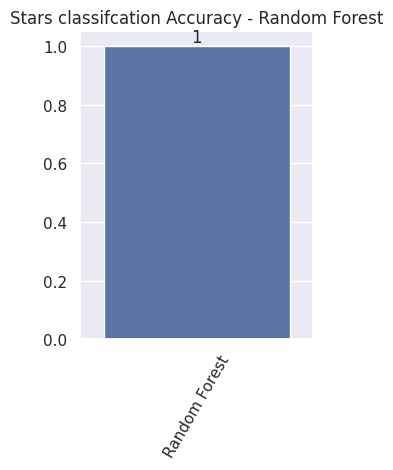

In [34]:
fig = plt.figure(figsize=(3,4))

splot = sns.barplot(x=['Random Forest'], y= [rf_accuracy])

splot.set_title('Stars classifcation Accuracy - Random Forest')
plt.bar_label(splot.containers[0])
plt.xticks(rotation=60)
plt.show()

> Matriz de Confusión

In [35]:
cm_rf = confusion_matrix(y_rp_test, rf_predictions, labels=rf_model.classes_)

Text(0.5, 40.24999999999997, 'Predicted Label')

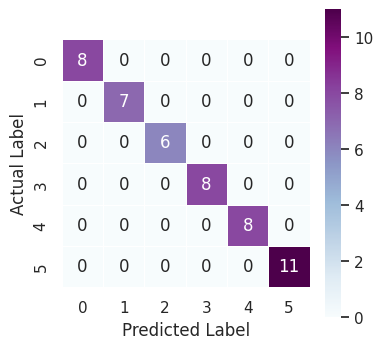

In [36]:
plt.figure(figsize=(4,4)) #tamaño de la figura
sns.heatmap(cm_rf, annot=True, linewidth=0.5, square=True, cmap='BuPu') 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

> Gráfica de árbol de decisión

- Import

In [37]:
from sklearn.tree import plot_tree

- Plot

[Text(0.36666666666666664, 0.9285714285714286, 'Luminosity <= -0.581\ngini = 0.829\nsamples = 126\nvalue = [37, 35, 29, 22, 34, 35]\nclass = 0'),
 Text(0.2, 0.7857142857142857, 'AbsoluteMagnitude <= 1.037\ngini = 0.663\nsamples = 69\nvalue = [37, 35, 29, 0, 0, 0]\nclass = 0'),
 Text(0.13333333333333333, 0.6428571428571429, 'SpectralClass <= -0.097\ngini = 0.496\nsamples = 46\nvalue = [0, 35, 29, 0, 0, 0]\nclass = 1'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [0, 0, 29, 0, 0, 0]\nclass = 2'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [0, 35, 0, 0, 0, 0]\nclass = 1'),
 Text(0.26666666666666666, 0.6428571428571429, 'gini = 0.0\nsamples = 23\nvalue = [37, 0, 0, 0, 0, 0]\nclass = 0'),
 Text(0.5333333333333333, 0.7857142857142857, 'StarColor <= -1.092\ngini = 0.654\nsamples = 57\nvalue = [0, 0, 0, 22, 34, 35]\nclass = 5'),
 Text(0.4, 0.6428571428571429, 'Radius <= 0.876\ngini = 0.377\nsamples = 20\nvalue = [0, 0, 0, 3, 27, 5]\nclass = 4'),
 Text(0.333333333

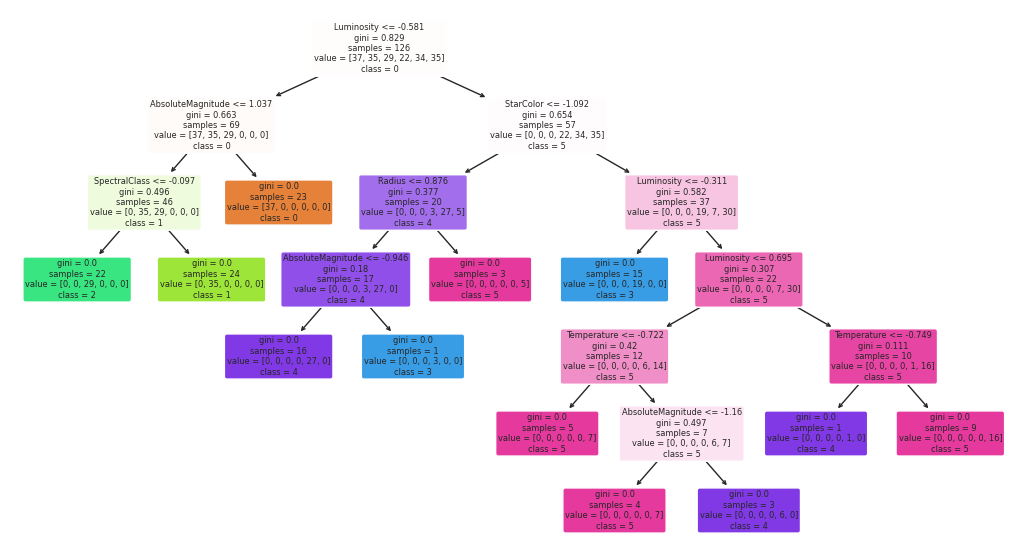

In [54]:
fig = plt.figure(figsize=(13, 7))

str_targets = str(y_rp.unique()).replace('[', '').replace(']', '').split(' ')

plot_tree(rf_model.estimators_[2], feature_names=x_rp.columns, class_names=str_targets, filled=True, impurity=True, rounded=True)

# Neural Networks
___

> Imports

In [39]:
import tensorflow as tf
from tensorflow import keras

2023-01-27 17:42:31.129998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 17:42:31.273250: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-27 17:42:31.279262: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-27 17:42:31.279283: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

> Crear la arquitectura, defino adentro cada layer

In [40]:
#creo el modelo y le doy la arquitectura

nn_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(6, activation='softmax')
])
# soft max da probabilidades a cada neurona del output

2023-01-27 17:42:37.997975: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-27 17:42:37.998020: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-27 17:42:37.998042: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-dbb742f7-e9e6-418d-9e02-197ef81a0ca5): /proc/driver/nvidia/version does not exist
2023-01-27 17:42:37.998408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


> Compilar modelo

In [41]:
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

> Entrenar modelo, elijo la cantidad de epochs

In [42]:
nn_model.fit(x_rp_train, y_rp_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 2ms/step - loss: 1.9125 - accuracy: 0.3229
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 1.8410 - accuracy: 0.3594
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 1.7737 - accuracy: 0.3750
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 1.7101 - accuracy: 0.3802
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 1.6489 - accuracy: 0.4115
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 1.5891 - accuracy: 0.4219
Epoch 7/100
6/6 [==============================] - 0s 1ms/step - loss: 1.5332 - accuracy: 0.4219
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 1.4779 - accuracy: 0.4531
Epoch 9/100
6/6 [==============================] - 0s 1ms/step - loss: 1.4232 - accuracy: 0.5208
Epoch 10/100
6/6 [==============================] - 0s 1ms/step - loss: 1.3722 - accuracy: 0.5573
Epoch 11/100
6/6 [===========

> Predicción

- Predicciones

In [43]:
nn_predictions = nn_model.predict(x_rp_test)
nn_predictions[0]


2/2 [==============================] - 0s 3ms/step


array([9.5143681e-03, 2.1945324e-03, 9.7957665e-01, 6.9702934e-03,
       2.0077190e-04, 1.5433935e-03], dtype=float32)

- Traduzco probabildades a predicciones

In [44]:
nn_predictions_array = []
for prediction in nn_predictions:
    np_prediction = np.array(prediction)
    nn_predictions_array.append(np_prediction.argmax())

In [45]:
len(nn_predictions_array)

48

> Evaluación con métodos de Tensor Flow

In [46]:
test_loss, test_acc = nn_model.evaluate(x_rp_test,y_rp_test)


2/2 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9792


In [47]:
test_acc

0.9791666865348816

> Gráfico accuracy

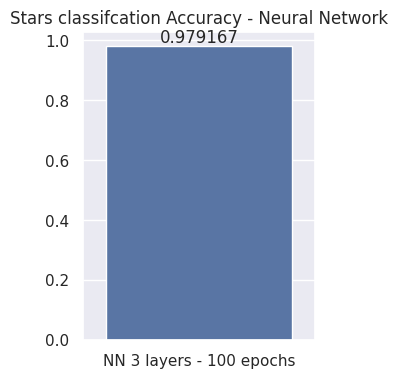

In [48]:
fig = plt.figure(figsize=(3,4))

splot = sns.barplot(x=['NN 3 layers - 100 epochs'], y= [test_acc])

splot.set_title('Stars classifcation Accuracy - Neural Network')
plt.bar_label(splot.containers[0])
plt.xticks(rotation=0)
plt.show()

> Matriz de confusión

In [49]:
##nn_model no tiene sus clases allí, igual le podría pasar las clases del y_test (target)
cm_nn = confusion_matrix(y_rp_test, nn_predictions_array, labels=rf_model.classes_)

Text(0.5, 40.24999999999997, 'Predicted Label')

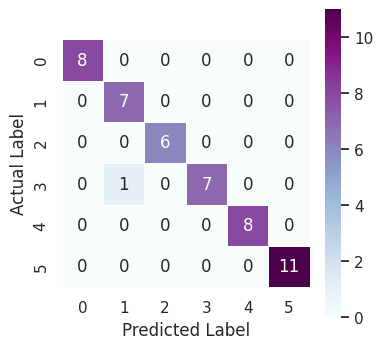

In [50]:
plt.figure(figsize=(4,4)) #tamaño de la figura
sns.heatmap(cm_nn, annot=True, linewidth=0.5, square=True, cmap='BuPu') 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dbb742f7-e9e6-418d-9e02-197ef81a0ca5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>